## <font size=5> <strong>Heart Disease Prediction


## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## II. Importing and understanding our dataset

---



In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/Dissertation /heartdisease/heart (1).csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Verifying it as a 'dataframe' object in pandas

In [4]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [5]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1


#### Description

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [11]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [12]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [13]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


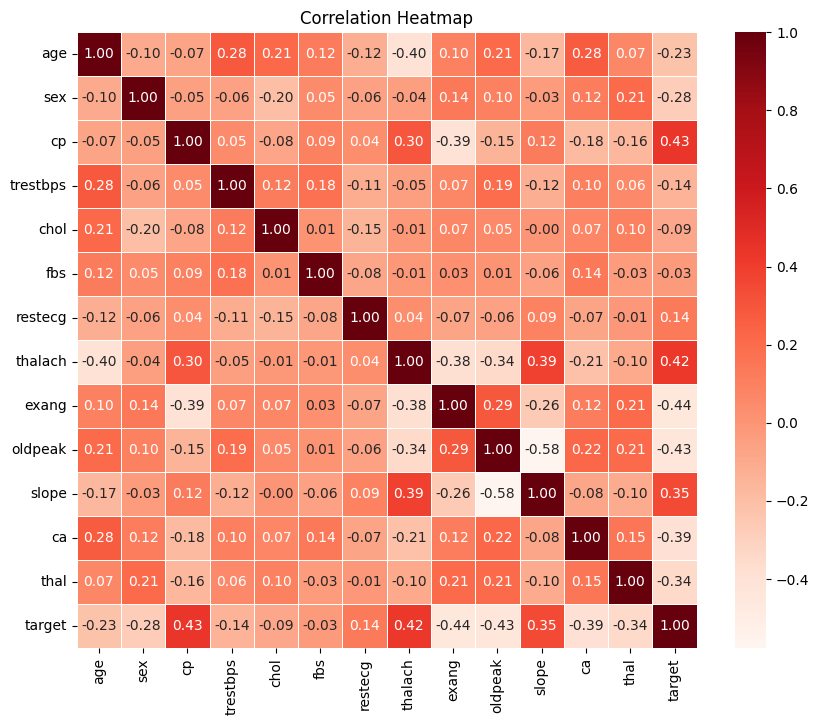

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = dataset.corr()

# Create a heatmap with red tones colormap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


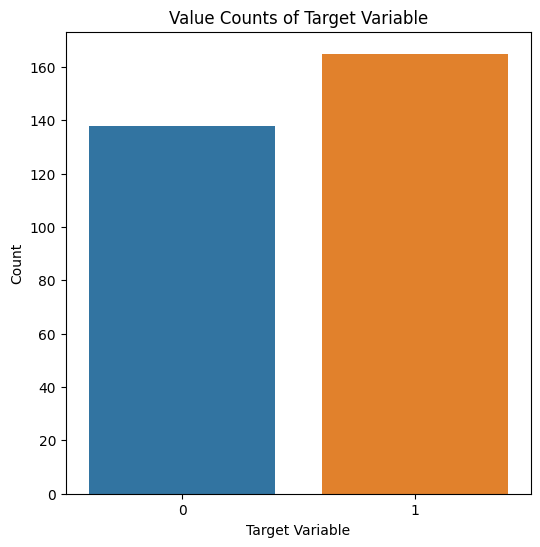

In [16]:
y = dataset["target"]

target_temp = dataset.target.value_counts()
print(target_temp)
# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e"]

# Plotting the value counts as a bar chart with custom colors
plt.figure(figsize=(6, 6))
sns.barplot(x=target_temp.index, y=target_temp.values, palette=colors)
plt.title('Value Counts of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

In [17]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [18]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

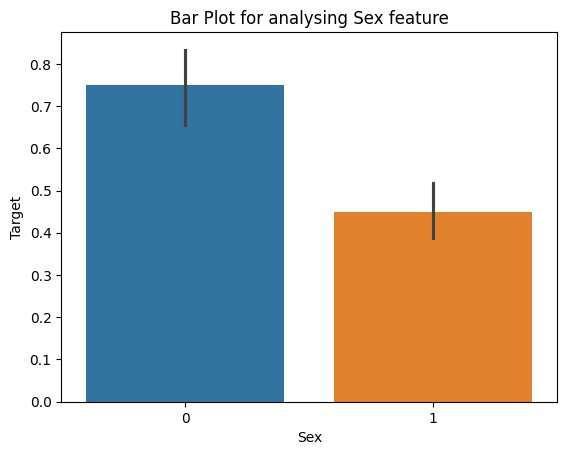

In [19]:
# Assuming 'dataset' is our DataFrame and 'sex' is one of the columns


# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e"]
# Create the bar plot with custom colors
sns.barplot(x=dataset["sex"], y=y, palette=colors)

# Add labels and title
plt.title('Bar Plot for analysing Sex feature')
plt.xlabel('Sex')
plt.ylabel('Target')

# Show the plot
plt.show()

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [20]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

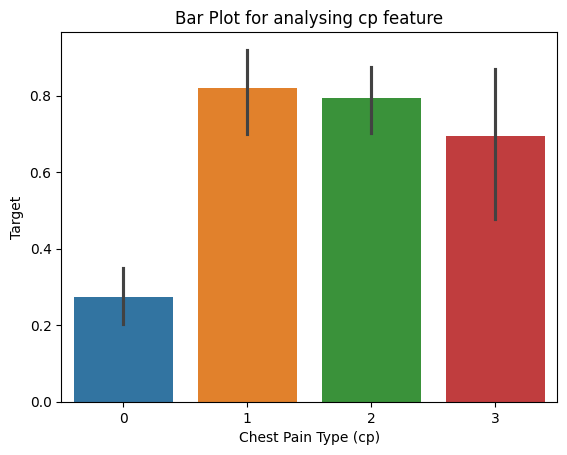

In [21]:
# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
# Create the bar plot with custom colors
sns.barplot(x=dataset["cp"], y=y, palette=colors)

# Add labels and title
plt.title('Bar Plot for analysing cp feature')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Target')

# Show the plot
plt.show()

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [22]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([1, 0])

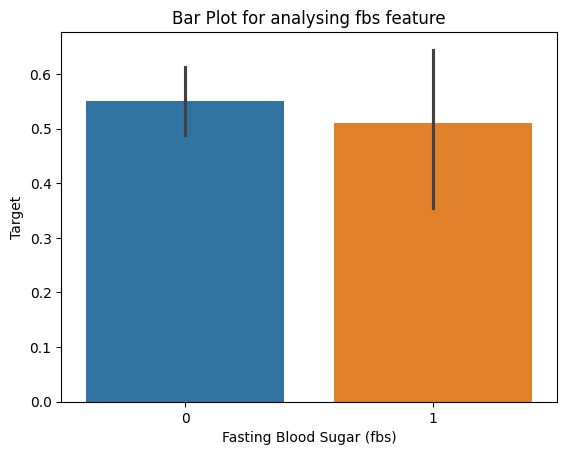

In [23]:
# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e"]

# Create the bar plot with custom colors
sns.barplot(x=dataset["fbs"], y=y, palette=colors)

# Add labels and title
plt.title('Bar Plot for analysing fbs feature')
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Target')

# Show the plot
plt.show()

##### Nothing extraordinary here

### Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([0, 1, 2])

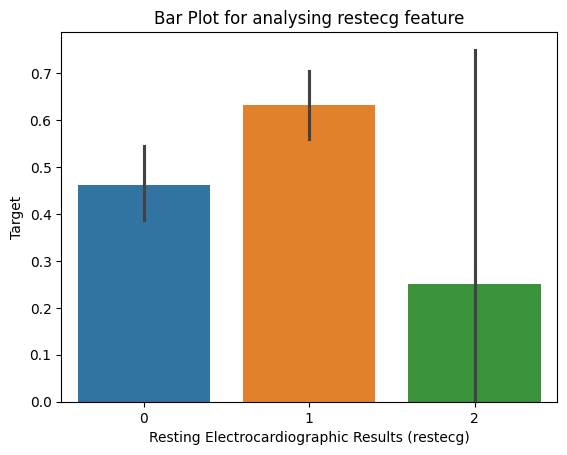

In [25]:
# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
# Create the bar plot with custom colors
sns.barplot(x=dataset["restecg"], y=y, palette=colors)

# Add labels and title
plt.title('Bar Plot for analysing restecg feature')
plt.xlabel('Resting Electrocardiographic Results (restecg)')
plt.ylabel('Target')

# Show the plot
plt.show()

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [26]:
dataset["exang"].unique()

array([0, 1])

Text(0, 0.5, 'Target')

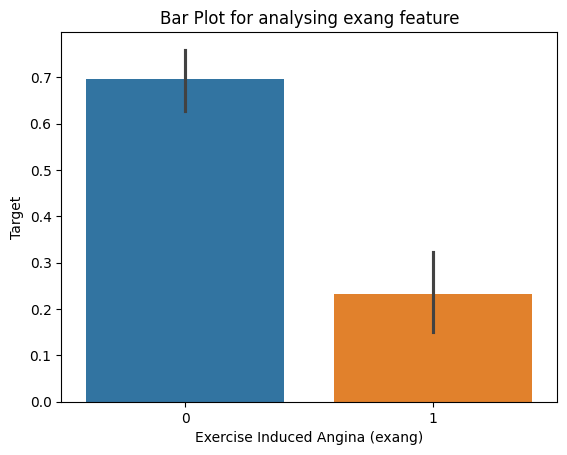

In [27]:
# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e"]

# Create the bar plot with custom colors
sns.barplot(x=dataset["exang"], y=y, palette=colors)

# Add labels and title
plt.title('Bar Plot for analysing exang feature')
plt.xlabel('Exercise Induced Angina (exang)')
plt.ylabel('Target')

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [28]:
dataset["slope"].unique()

array([0, 2, 1])

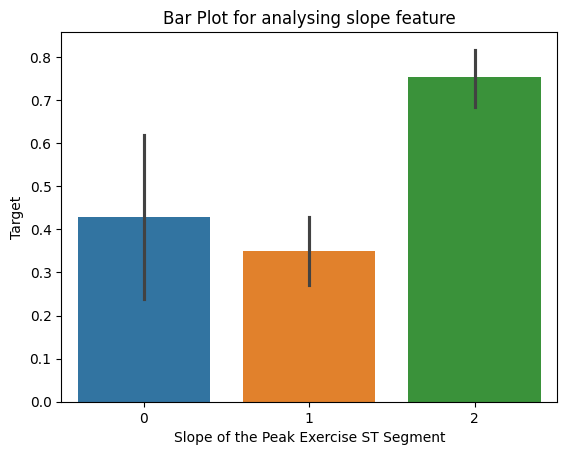

In [29]:
# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create the bar plot with custom colors
sns.barplot(x=dataset["slope"], y=y, palette=colors)

# Add labels and title
plt.title('Bar Plot for analysing slope feature')
plt.xlabel('Slope of the Peak Exercise ST Segment')
plt.ylabel('Target')

# Show the plot
plt.show()

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [31]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

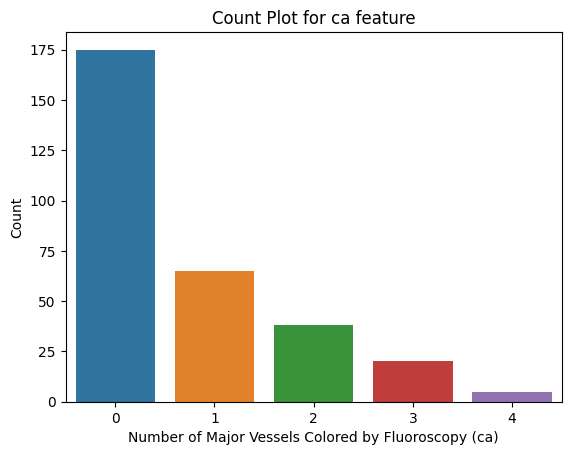

In [32]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Create the count plot with custom colors
sns.countplot(x=dataset["ca"], palette=colors)

# Add labels and title
plt.title('Count Plot for ca feature')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy (ca)')
plt.ylabel('Count')

# Show the plot
plt.show()

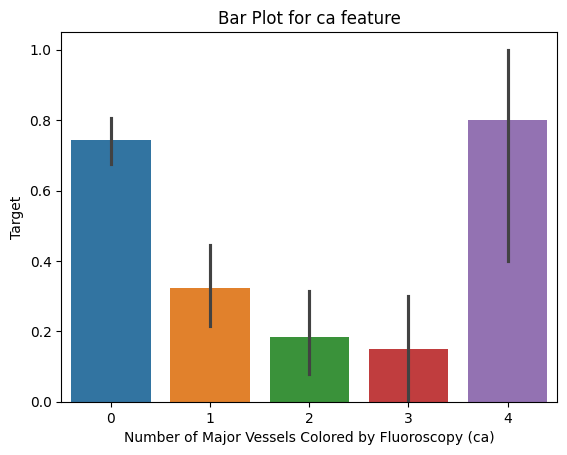

In [33]:
# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Create the bar plot with custom colors
sns.barplot(x=dataset["ca"], y=y, palette=colors)

# Add labels and title
plt.title('Bar Plot for ca feature')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy (ca)')
plt.ylabel('Target')

# Show the plot
plt.show()

##### ca=4 has astonishingly large number of heart patients

In [ ]:
### Analysing the 'thal' feature

In [34]:
dataset["thal"].unique()

array([1, 2, 3, 0])

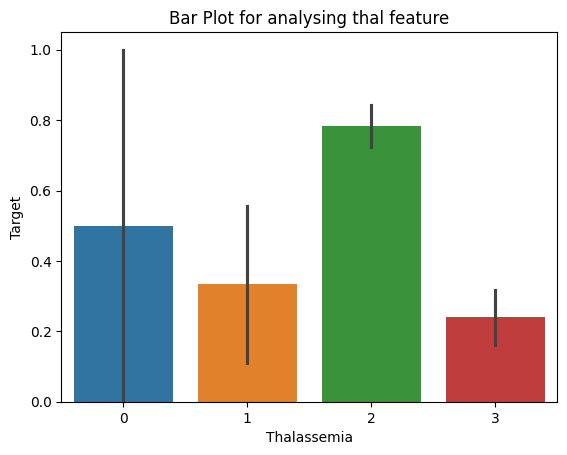

In [35]:
# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create the bar plot with custom colors
sns.barplot(x=dataset["thal"], y=y, palette=colors)

# Add labels and title
plt.title('Bar Plot for analysing thal feature')
plt.xlabel('Thalassemia')
plt.ylabel('Target')

# Show the plot
plt.show()

<Axes: xlabel='thal', ylabel='Density'>

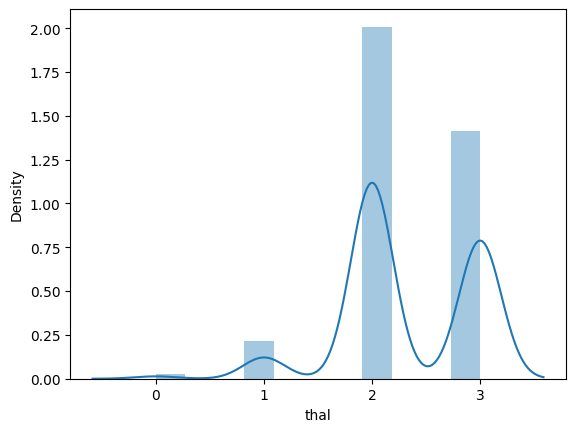

In [36]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [ ]:
Y_train.shape

(242,)

In [ ]:
Y_test.shape

(61,)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## V. Model Fitting

### SVM

##without optimization

In [39]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
# Instantiate the best model with the best parameters
simple_svm = svm.SVC()

# Train the best model
simple_svm.fit(X_train, Y_train)

# Predict using the best model
Y_pred_ssvm = simple_svm.predict(X_test)

In [41]:
score_ssvm = round(accuracy_score(Y_pred_ssvm,Y_test)*100,2)

print("The accuracy score achieved using Simple Linear SVM is: "+str(score_ssvm)+" %")
# Calculate precision
ssvm_precision = round(precision_score(Y_test, Y_pred_ssvm)*100,2)
print("The precision score achieved using Simple Linear SVM scaled is: "+str(ssvm_precision)+" %")

# Calculate recall
ssvm_recall = round(recall_score(Y_test, Y_pred_ssvm)*100,2)
print("The recall score achieved using Simple Linear SVM scaled is: "+str(ssvm_recall)+" %")

# Calculate F1-score
ssvm_f1 = round(f1_score(Y_test, Y_pred_ssvm)*100,2)
print("The f1 score achieved using Simple Linear SVM scaled is: "+str(ssvm_f1)+" %")

The accuracy score achieved using Simple Linear SVM is: 68.85 %
The precision score achieved using Simple Linear SVM scaled is: 67.44 %
The recall score achieved using Simple Linear SVM scaled is: 85.29 %
The f1 score achieved using Simple Linear SVM scaled is: 75.32 %


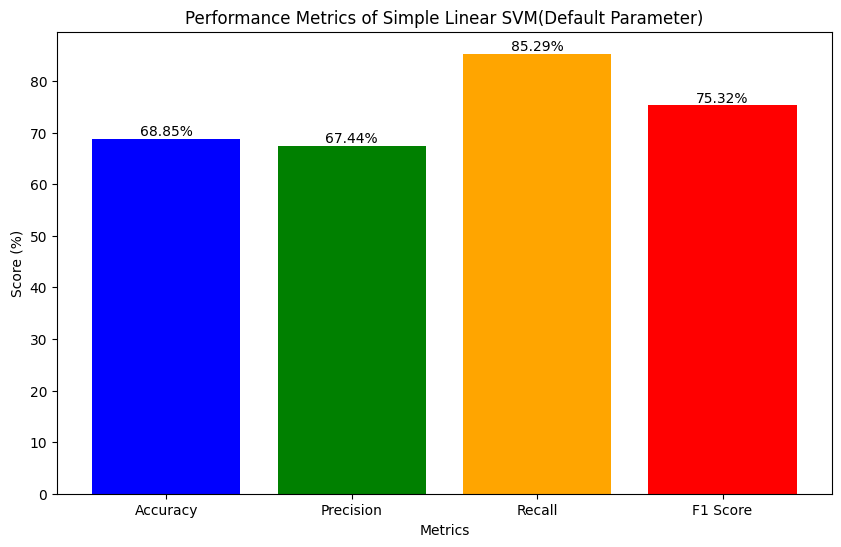

In [42]:
# Define the scores
scores = [score_ssvm, ssvm_precision, ssvm_recall, ssvm_f1]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(score_names, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics of Simple Linear SVM(Default Parameter)')
plt.xlabel('Metrics')
plt.ylabel('Score (%)')

# Add the scores as text labels
for i in range(len(scores)):
    plt.text(i, scores[i], str(scores[i]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()


##With Optimization(not scaling)

In [44]:
# Define the parameter grid

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1],
    'kernel': [ 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

In [45]:
# Perform the grid search
grid_search.fit(X_train, Y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best accuracy: 0.8225340136054422


In [46]:
# Instantiate the best model with the best parameters
best_svm = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Train the best model
best_svm.fit(X_train, Y_train)

# Predict using the best model
Y_pred_svm = best_svm.predict(X_test)

In [47]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM(Optimization) is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM(Optimization) is: 83.61 %


In [48]:
# Calculate precision
svm_precision = round(precision_score(Y_test, Y_pred_svm)*100,2)
print("The precision score achieved using Linear SVM(Optimization) is: "+str(svm_precision)+" %")

# Calculate recall
svm_recall = round(recall_score(Y_test, Y_pred_svm)*100,2)
print("The recall score achieved using Linear SVM(Optimization) is: "+str(svm_recall)+" %")

# Calculate F1-score
svm_f1 = round(f1_score(Y_test, Y_pred_svm)*100,2)
print("The f1 score achieved using Linear SVM(Optimization) is: "+str(svm_f1)+" %")

The precision score achieved using Linear SVM(Optimization) is: 81.58 %
The recall score achieved using Linear SVM(Optimization) is: 91.18 %
The f1 score achieved using Linear SVM(Optimization) is: 86.11 %


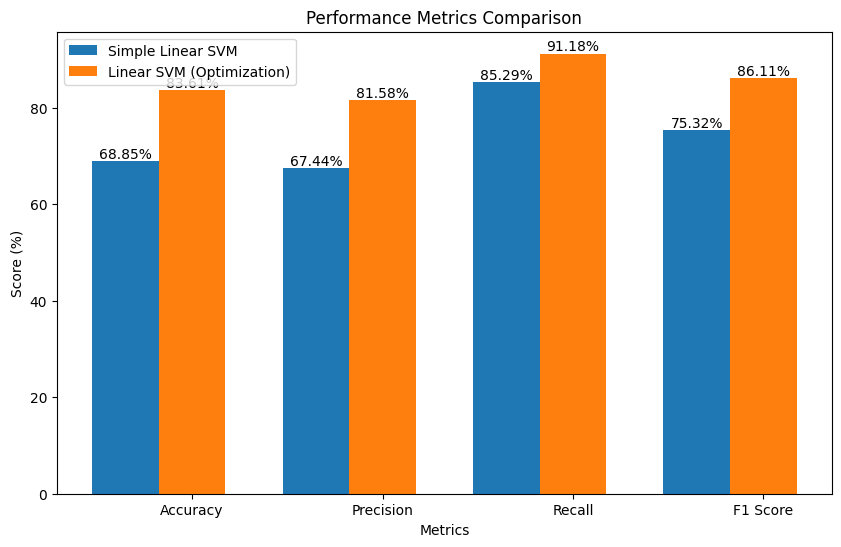

In [49]:
# Define the scores for Linear SVM (Optimization) and Simple Linear SVM
svm_scores = [score_svm, svm_precision, svm_recall, svm_f1]
svm_score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Combine scores
all_scores = [scores, svm_scores]
methods = ["Simple Linear SVM", "Linear SVM (Optimization)"]

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(svm_scores))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison')
plt.xticks([x + bar_width for x in index], svm_score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

##With Optimization(Scaling)

In [50]:
# Instantiate the best model with the best parameters
best_svm_scaled = svm.SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
# Train the best model
best_svm_scaled.fit(X_train_scaled, Y_train)

# Predict using the best model
Y_pred_svm_sc = best_svm_scaled.predict(X_test_scaled)
score_svm_sc = round(accuracy_score(Y_pred_svm_sc,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM(Optimization) scaled is: "+str(score_svm_sc)+" %")
# Calculate precision
svm_precision_sc = round(precision_score(Y_test, Y_pred_svm_sc)*100,2)
print("The precision score achieved using Linear SVM(Optimization) scaled is: "+str(svm_precision_sc)+" %")

# Calculate recall
svm_recall_sc = round(recall_score(Y_test, Y_pred_svm_sc)*100,2)
print("The recall score achieved using Linear SVM(Optimization) scaled is: "+str(svm_recall_sc)+" %")

# Calculate F1-score
svm_f1_sc = round(f1_score(Y_test, Y_pred_svm_sc)*100,2)
print("The f1 score achieved using Linear SVM(Optimization) scaled is: "+str(svm_f1_sc)+" %")

The accuracy score achieved using Linear SVM(Optimization) scaled is: 80.33 %
The precision score achieved using Linear SVM(Optimization) scaled is: 78.95 %
The recall score achieved using Linear SVM(Optimization) scaled is: 88.24 %
The f1 score achieved using Linear SVM(Optimization) scaled is: 83.33 %


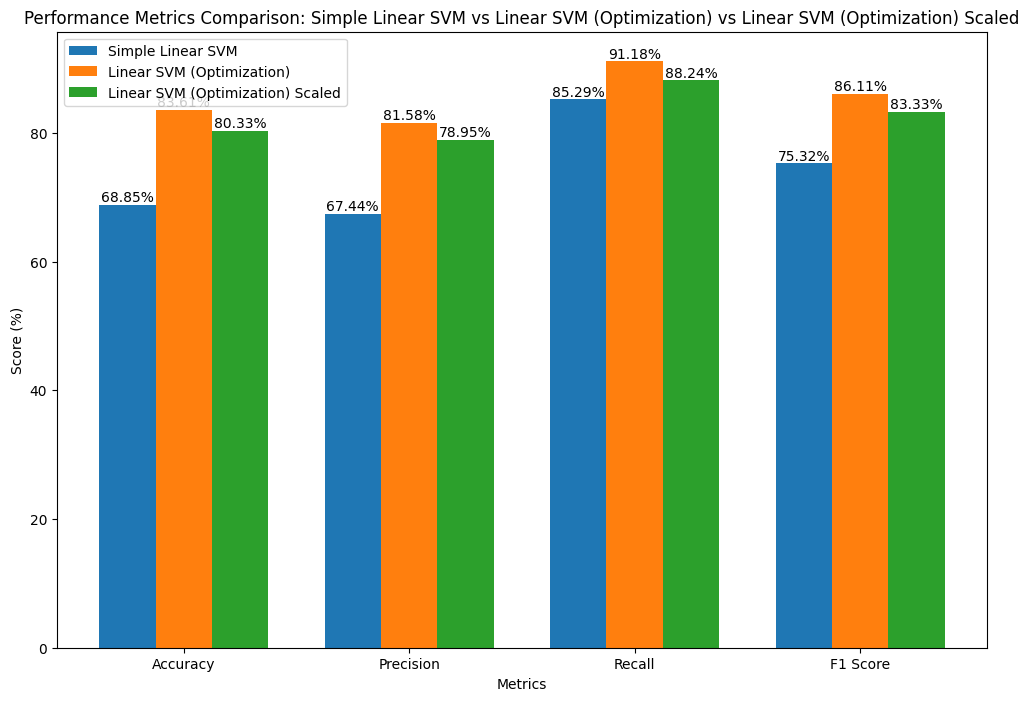

In [51]:
# Define the scores for Simple Linear SVM (without optimization)---------
svm_scores_sc = [score_svm_sc, svm_precision_sc, svm_recall_sc, svm_f1_sc]

# Combine all scores
all_scores = [scores, svm_scores, svm_scores_sc]
methods = ["Simple Linear SVM", "Linear SVM (Optimization)", "Linear SVM (Optimization) Scaled"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = range(len(score_names))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison: Simple Linear SVM vs Linear SVM (Optimization) vs Linear SVM (Optimization) Scaled')
plt.xticks([x + bar_width for x in index], score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

### K Nearest Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier

##without Optimization

In [53]:
# Instantiate the best model with the best parameters
simple_knn = KNeighborsClassifier()

# Train the best model
simple_knn.fit(X_train, Y_train)

# Predict using the best model
Y_pred_sknn = simple_knn.predict(X_test)

In [54]:
score_sknn = round(accuracy_score(Y_pred_sknn,Y_test)*100,2)

print("The accuracy score achieved using Simple KNN is: "+str(score_sknn)+" %")
# Calculate precision
sknn_precision = round(precision_score(Y_test, Y_pred_sknn)*100,2)
print("The precision score achieved using Simple KNN is: "+str(sknn_precision)+" %")

# Calculate recall
sknn_recall = round(recall_score(Y_test, Y_pred_sknn)*100,2)
print("The recall score achieved using SimpleKNN is: "+str(sknn_recall)+" %")

# Calculate F1-score
sknn_f1 = round(f1_score(Y_test, Y_pred_sknn)*100,2)
print("The f1 score achieved using Simple KNN is: "+str(sknn_f1)+" %")

The accuracy score achieved using Simple KNN is: 63.93 %
The precision score achieved using Simple KNN is: 68.75 %
The recall score achieved using SimpleKNN is: 64.71 %
The f1 score achieved using Simple KNN is: 66.67 %


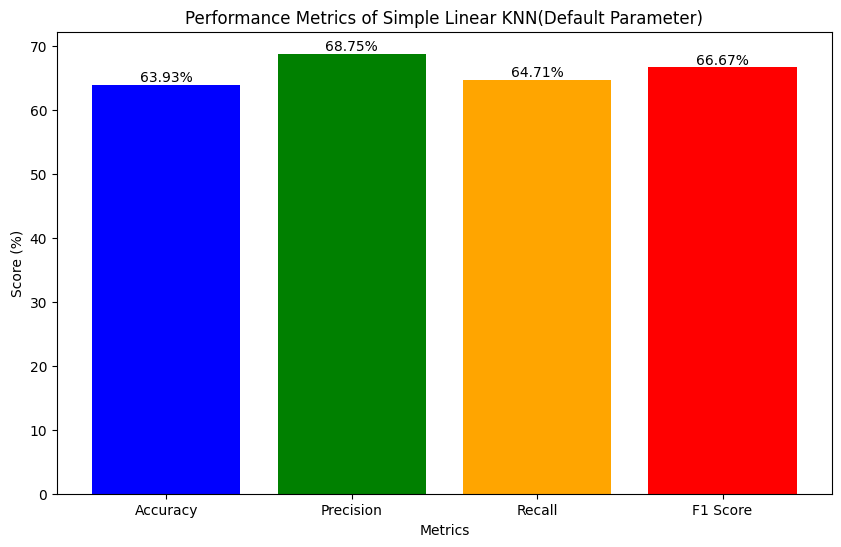

In [55]:
# Define the scores for Simple KNN
knn_scores = [score_sknn, sknn_precision, sknn_recall, sknn_f1]

# Combine all scores
all_scores = [knn_scores]
methods = ["Simple KNN"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(score_names, knn_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics of Simple Linear KNN(Default Parameter)')
plt.xlabel('Metrics')
plt.ylabel('Score (%)')

# Add the scores as text labels
for i in range(len(knn_scores)):
    plt.text(i, knn_scores[i], str(knn_scores[i]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

##Optimization without scaling

In [56]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

In [57]:
# Perform the grid search
grid_search.fit(X_train, Y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [58]:
# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'weights': 'distance'}
Best accuracy: 0.6364795918367347


In [59]:
# Instantiate the best model with the best parameters
best_knn = KNeighborsClassifier(**best_params)

# Train the best model
best_knn.fit(X_train, Y_train)

# Predict using the best model
Y_pred_knn = best_knn.predict(X_test)

In [60]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN(Optimization) is: "+str(score_knn)+" %")

The accuracy score achieved using KNN(Optimization) is: 63.93 %


In [61]:
# Calculate precision
knn_precision = round(precision_score(Y_test, Y_pred_knn)*100,2)
print("The precision score achieved using KNN(Optimization) is: "+str(knn_precision)+" %")

# Calculate recall
knn_recall = round(recall_score(Y_test, Y_pred_knn)*100,2)
print("The recall score achieved using KNN(Optimization) is: "+str(knn_recall)+" %")

# Calculate F1-score
knn_f1 = round(f1_score(Y_test, Y_pred_knn)*100,2)
print("The f1 score achieved using KNN(Optimization) is: "+str(knn_f1)+" %")

The precision score achieved using KNN(Optimization) is: 68.75 %
The recall score achieved using KNN(Optimization) is: 64.71 %
The f1 score achieved using KNN(Optimization) is: 66.67 %


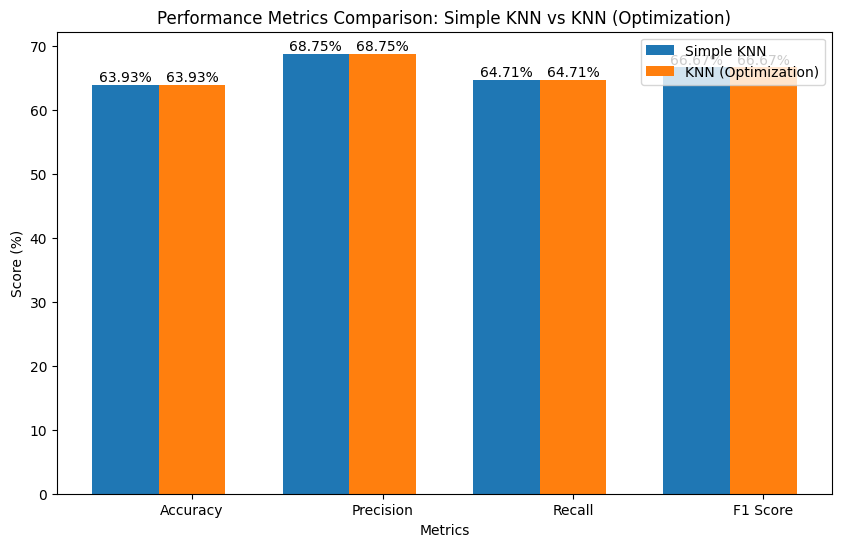

In [62]:
import matplotlib.pyplot as plt

# Define the scores for KNN (Optimization)
knn_optimization_scores = [score_knn, knn_precision, knn_recall, knn_f1]

# Combine all scores
all_scores = [knn_scores, knn_optimization_scores]
methods = ["Simple KNN", "KNN (Optimization)"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(score_names))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison: Simple KNN vs KNN (Optimization)')
plt.xticks([x + bar_width for x in index], score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()


## Optimization with scaling

In [63]:
# Instantiate the best model with the best parameters
best_knn_sc = KNeighborsClassifier(**best_params)

# Train the best model
best_knn_sc.fit(X_train_scaled, Y_train)

# Predict using the best model
Y_pred_knn_sc = best_knn_sc.predict(X_test_scaled)
score_knn_sc = round(accuracy_score(Y_pred_knn_sc,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn_sc)+" %")

The accuracy score achieved using KNN is: 83.61 %


In [64]:
# Calculate precision
knn_precision_sc = round(precision_score(Y_test, Y_pred_knn_sc)*100,2)
print("The precision score achieved using KNN scaled is: "+str(knn_precision_sc)+" %")

# Calculate recall
knn_recall_sc = round(recall_score(Y_test, Y_pred_knn_sc)*100,2)
print("The recall score achieved using KNN scaled is: "+str(knn_recall_sc)+" %")

# Calculate F1-score
knn_f1_sc = round(f1_score(Y_test, Y_pred_knn_sc)*100,2)
print("The F1 score achieved using KNN scaled is: "+str(knn_f1_sc)+" %")

The precision score achieved using KNN scaled is: 83.33 %
The recall score achieved using KNN scaled is: 88.24 %
The F1 score achieved using KNN scaled is: 85.71 %


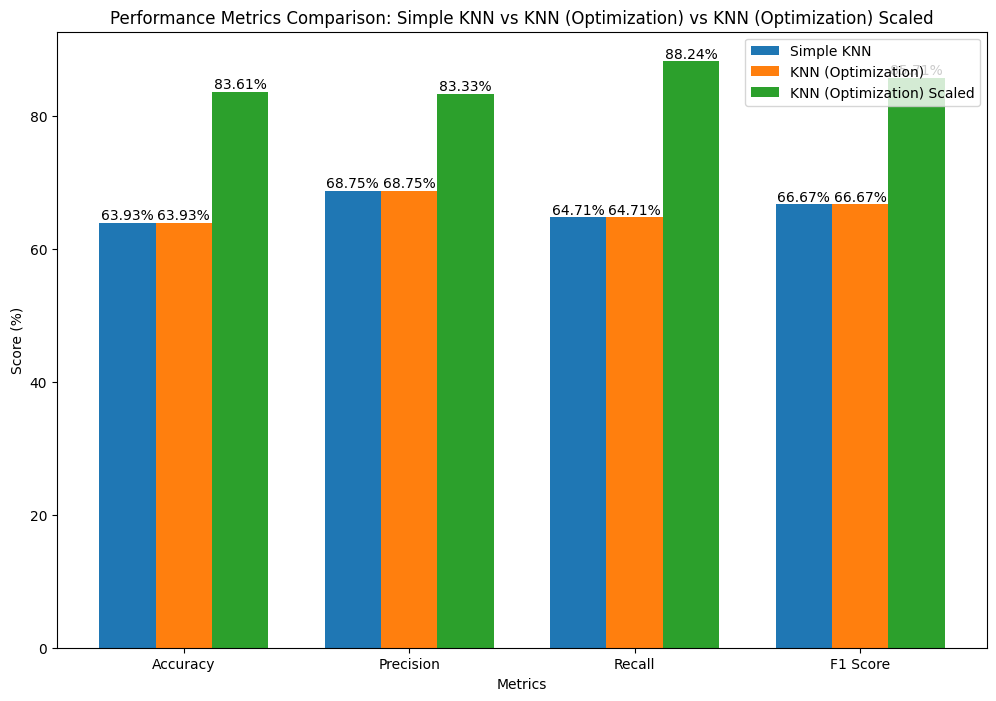

In [65]:
# Define the scores for KNN (Optimization) with scaled features
knn_scaled_scores = [score_knn_sc, knn_precision_sc, knn_recall_sc, knn_f1_sc]

# Combine all scores
all_scores = [knn_scores, knn_optimization_scores, knn_scaled_scores]
methods = ["Simple KNN", "KNN (Optimization)", "KNN (Optimization) Scaled"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = range(len(score_names))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison: Simple KNN vs KNN (Optimization) vs KNN (Optimization) Scaled')
plt.xticks([x + bar_width for x in index], score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
# Instantiate the best model with the best parameters
simple_dt = DecisionTreeClassifier()

# Train the best model
simple_dt.fit(X_train_scaled, Y_train)

# Predict using the best model
Y_pred_sdt = simple_dt.predict(X_test_scaled)
score_sdt = round(accuracy_score(Y_pred_sdt,Y_test)*100,2)
print("The accuracy score achieved using Simple Decision Tree is: "+str(score_sdt)+" %")
# Calculate precision
sdt_precision = round(precision_score(Y_test, Y_pred_sdt)*100,2)
print("The precision score achieved using Simple DT  is: "+str(sdt_precision)+" %")

# Calculate recall
sdt_recall = round(recall_score(Y_test, Y_pred_sdt)*100,2)
print("The recall score achieved using Simple DT is: "+str(sdt_recall)+" %")

# Calculate F1-score
sdt_f1 = round(f1_score(Y_test, Y_pred_sdt)*100,2)
print("The f1 score achieved using Simple DT is: "+str(sdt_f1)+" %")

The accuracy score achieved using Simple Decision Tree is: 73.77 %
The precision score achieved using Simple DT  is: 80.0 %
The recall score achieved using Simple DT is: 70.59 %
The f1 score achieved using Simple DT is: 75.0 %


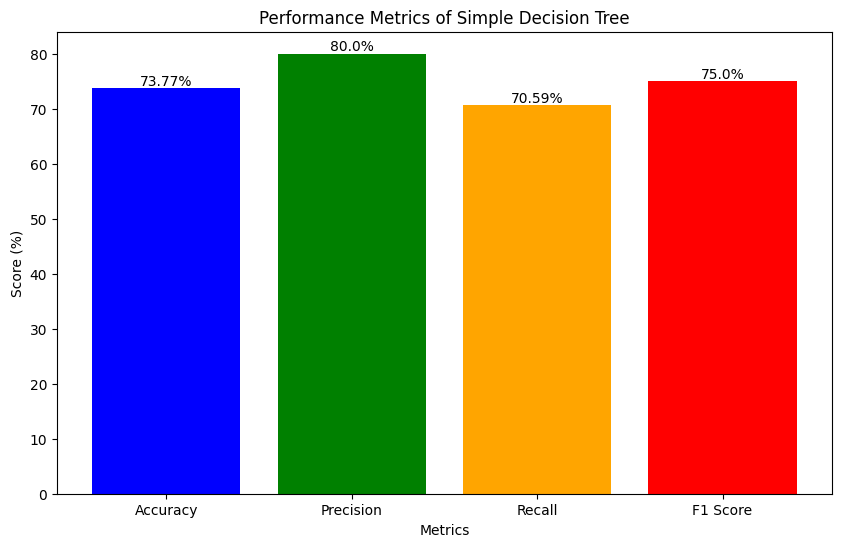

In [68]:
# Define the scores for Simple Decision Tree
dt_scores = [score_sdt, sdt_precision, sdt_recall, sdt_f1]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(score_names, dt_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics of Simple Decision Tree')
plt.xlabel('Metrics')
plt.ylabel('Score (%)')

# Add the scores as text labels
for i in range(len(dt_scores)):
    plt.text(i, dt_scores[i], str(dt_scores[i]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()


##Optimization (without scaling)

In [69]:
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

# Instantiate the best model with the best parameters
best_dt = DecisionTreeClassifier(**best_params, random_state=42)

# Train the best model
best_dt.fit(X_train, Y_train)

# Predict using the best model
Y_pred_dt = best_dt.predict(X_test)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy: 0.7978741496598639


In [70]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree(Optimization) is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree(Optimization) is: 78.69 %


In [71]:
# Calculate precision
dt_precision = round(precision_score(Y_test, Y_pred_dt)*100,2)
print("The precision score achieved using Decision Tree(Optimization)  is: "+str(dt_precision)+" %")

# Calculate recall
dt_recall = round(recall_score(Y_test, Y_pred_dt)*100,2)
print("The recall score achieved using Decision Tree(Optimization) is: "+str(dt_recall)+" %")

# Calculate F1-score
dt_f1 = round(f1_score(Y_test, Y_pred_dt)*100,2)
print("The f1 score achieved using Decision Tree(Optimization) is: "+str(dt_f1)+" %")

The precision score achieved using Decision Tree(Optimization)  is: 86.21 %
The recall score achieved using Decision Tree(Optimization) is: 73.53 %
The f1 score achieved using Decision Tree(Optimization) is: 79.37 %


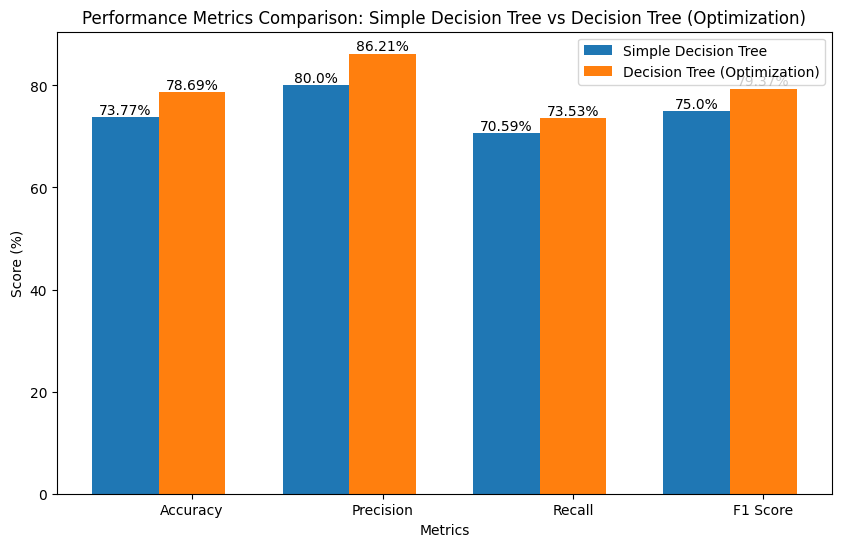

In [72]:
# Define the scores for Decision Tree (Optimization)
dt_optimization_scores = [score_dt, dt_precision, dt_recall, dt_f1]

# Combine all scores
all_scores = [dt_scores, dt_optimization_scores]
methods = ["Simple Decision Tree", "Decision Tree (Optimization)"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(score_names))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison: Simple Decision Tree vs Decision Tree (Optimization)')
plt.xticks([x + bar_width for x in index], score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

##Optimization with scaling

In [74]:
# Instantiate the best model with the best parameters
best_dt_sc = DecisionTreeClassifier(**best_params, random_state=42)

# Train the best model
best_dt_sc.fit(X_train_scaled, Y_train)

# Predict using the best model
Y_pred_dt_sc = best_dt_sc.predict(X_test_scaled)
score_dt_sc = round(accuracy_score(Y_pred_dt_sc,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree(Optimization) scaled is: "+str(score_dt_sc)+" %")

The accuracy score achieved using Decision Tree(Optimization) scaled is: 78.69 %


In [75]:
# Calculate precision
dt_precision_sc = round(precision_score(Y_test, Y_pred_dt_sc)*100,2)
print("The precision score achieved using Decision Tree(Optimization) scaled  is: "+str(dt_precision_sc)+" %")

# Calculate recall
dt_recall_sc = round(recall_score(Y_test, Y_pred_dt_sc)*100,2)
print("The recall score achieved using Decision Tree(Optimization) scaled is: "+str(dt_recall_sc)+" %")

# Calculate F1-score
dt_f1_sc = round(f1_score(Y_test, Y_pred_dt_sc)*100,2)
print("The f1 score achieved using Decision Tree(Optimization) scaled is: "+str(dt_f1_sc)+" %")

The precision score achieved using Decision Tree(Optimization) scaled  is: 86.21 %
The recall score achieved using Decision Tree(Optimization) scaled is: 73.53 %
The f1 score achieved using Decision Tree(Optimization) scaled is: 79.37 %


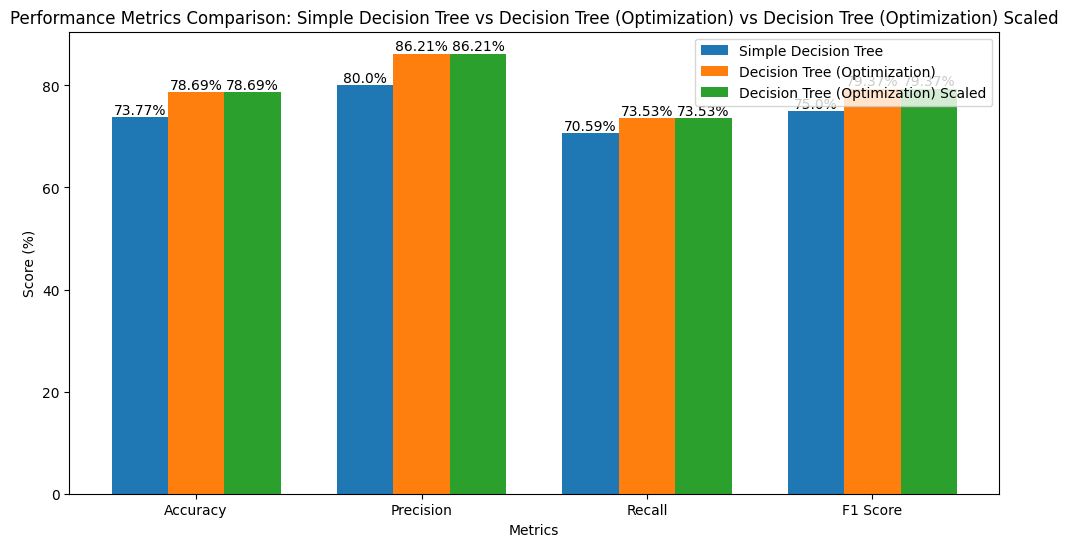

In [76]:
# Define the scores for Decision Tree (Optimization) with scaled features
dt_scaled_scores = [score_dt_sc, dt_precision_sc, dt_recall_sc, dt_f1_sc]

# Combine all scores
all_scores = [dt_scores, dt_optimization_scores, dt_scaled_scores]
methods = ["Simple Decision Tree", "Decision Tree (Optimization)", "Decision Tree (Optimization) Scaled"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(score_names))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison: Simple Decision Tree vs Decision Tree (Optimization) vs Decision Tree (Optimization) Scaled')
plt.xticks([x + bar_width for x in index], score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier


##Without Optimization

In [78]:
# Train the best model

simple_rf = RandomForestClassifier()
srf_model = simple_rf.fit(X_train, Y_train)

# Predict using the best model
Y_pred_srf = srf_model.predict(X_test)
score_srf = round(accuracy_score(Y_pred_srf,Y_test)*100,2)

print("The accuracy score achieved using rf is: "+str(score_srf)+" %")
# Calculate precision
srf_precision = round(precision_score(Y_test, Y_pred_srf)*100,2)
print("The precision score achieved using RF is: "+str(srf_precision)+" %")

# Calculate recall
srf_recall = round(recall_score(Y_test, Y_pred_srf)*100,2)
print("The recall score achieved using RF is: "+str(srf_recall)+" %")

# Calculate F1-score
srf_f1 = round(f1_score(Y_test, Y_pred_srf)*100,2)
print("The f1 score achieved using RF is: "+str(srf_f1)+" %")

The accuracy score achieved using rf is: 83.61 %
The precision score achieved using RF is: 83.33 %
The recall score achieved using RF is: 88.24 %
The f1 score achieved using RF is: 85.71 %


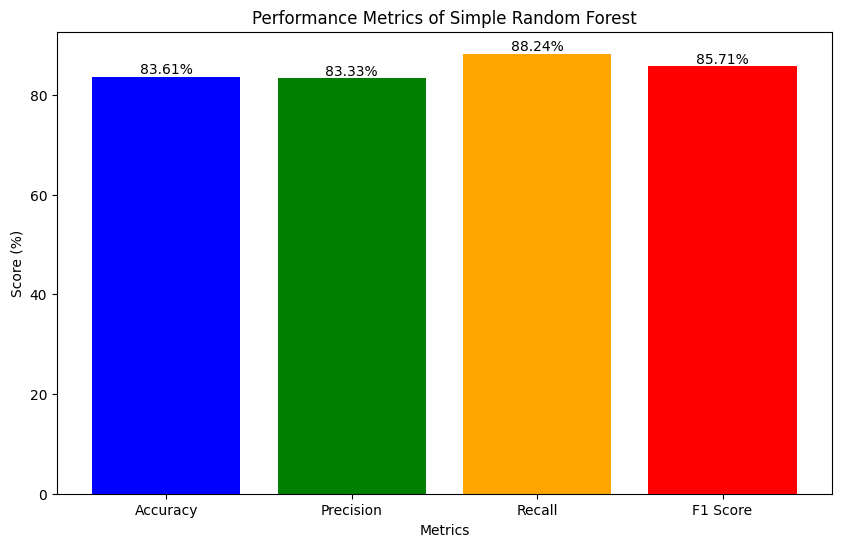

In [79]:
# Define the scores for Simple Random Forest
rf_scores = [score_srf, srf_precision, srf_recall, srf_f1]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(score_names, rf_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics of Simple Random Forest')
plt.xlabel('Metrics')
plt.ylabel('Score (%)')

# Add the scores as text labels
for i in range(len(rf_scores)):
    plt.text(i, rf_scores[i], str(rf_scores[i]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

In [80]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, Y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)

# Instantiate the best model with the best parameters
best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 bootstrap=best_params['bootstrap'])

# Train the best model
best_rf.fit(X_train, Y_train)

# Predict using the best model
Y_pred_rf = best_rf.predict(X_test)


Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy: 0.8516156462585034


In [81]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using RF(Optimizatin) is: "+str(score_rf)+" %")
# Calculate precision
rf_precision = round(precision_score(Y_test, Y_pred_rf)*100,2)
print("The precision score achieved using RF(Optimizatin) is: "+str(rf_precision)+" %")

# Calculate recall
rf_recall = round(recall_score(Y_test, Y_pred_rf)*100,2)
print("The recall score achieved using RF(Optimizatin) is: "+str(rf_recall)+" %")

# Calculate F1-score
rf_f1 = round(f1_score(Y_test, Y_pred_rf)*100,2)
print("The f1 score achieved using RF(Optimizatin) is: "+str(rf_f1)+" %")

The accuracy score achieved using RF(Optimizatin) is: 85.25 %
The precision score achieved using RF(Optimizatin) is: 87.88 %
The recall score achieved using RF(Optimizatin) is: 85.29 %
The f1 score achieved using RF(Optimizatin) is: 86.57 %


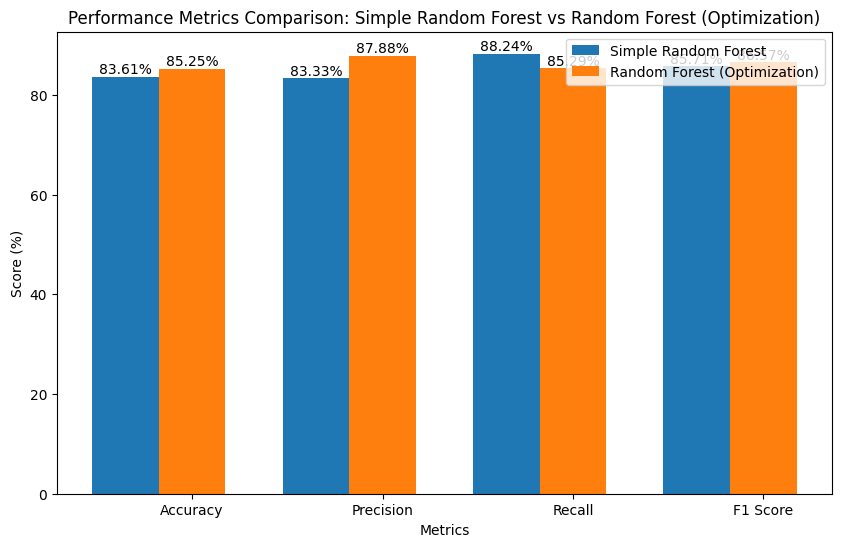

In [82]:
# Define the scores for Random Forest (Optimization)
rf_optimization_scores = [score_rf, rf_precision, rf_recall, rf_f1]

# Combine all scores
all_scores = [rf_scores, rf_optimization_scores]
methods = ["Simple Random Forest", "Random Forest (Optimization)"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(score_names))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison: Simple Random Forest vs Random Forest (Optimization)')
plt.xticks([x + bar_width for x in index], score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

In [83]:
# Instantiate the best model with the best parameters
best_rf_sc = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                 max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 bootstrap=best_params['bootstrap'])

# Train the best model
rf_model_sc = best_rf_sc.fit(X_train_scaled, Y_train)

# Predict using the best model
Y_pred_rf_sc = rf_model_sc.predict(X_test_scaled)
score_rf_sc = round(accuracy_score(Y_pred_rf_sc,Y_test)*100,2)

print("The accuracy score achieved using RF(Optimizatin) scaled is: "+str(score_rf_sc)+" %")

The accuracy score achieved using RF(Optimizatin) scaled is: 81.97 %


In [84]:
# Calculate precision
rf_precision_sc = round(precision_score(Y_test, Y_pred_rf_sc)*100,2)
print("The precision score achieved using RF(Optimizatin) scaled is: "+str(rf_precision_sc)+" %")

# Calculate recall
rf_recall_sc = round(recall_score(Y_test, Y_pred_rf_sc)*100,2)
print("The recall score achieved using RF(Optimizatin) scaled is: "+str(rf_recall_sc)+" %")

# Calculate F1-score
rf_f1_sc = round(f1_score(Y_test, Y_pred_rf_sc)*100,2)
print("The f1 score achieved using RF(Optimizatin) scaled is: "+str(rf_f1_sc)+" %")

The precision score achieved using RF(Optimizatin) scaled is: 82.86 %
The recall score achieved using RF(Optimizatin) scaled is: 85.29 %
The f1 score achieved using RF(Optimizatin) scaled is: 84.06 %


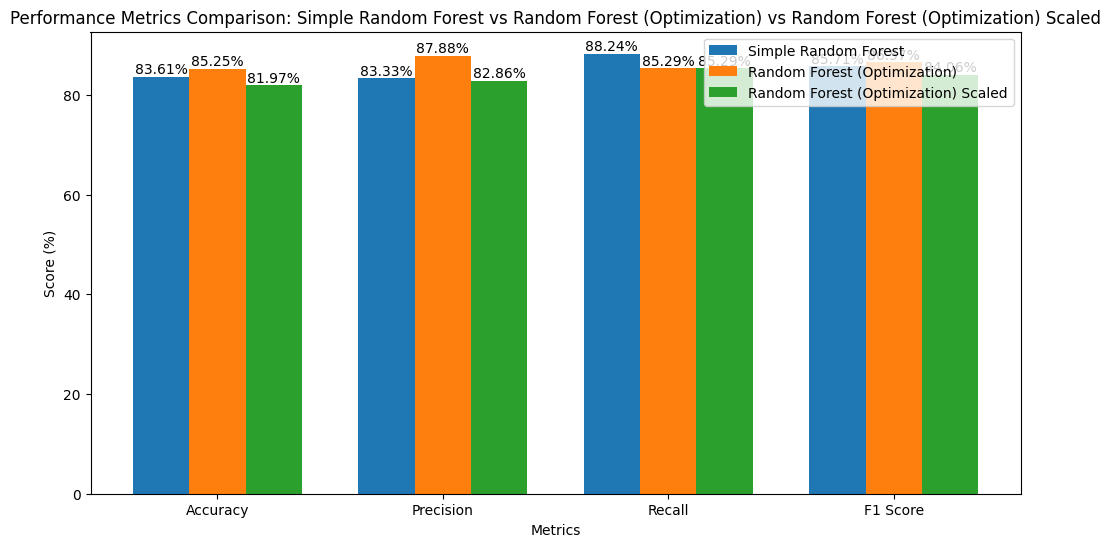

In [85]:
# Define the scores for Random Forest (Optimization) with scaled features
rf_scaled_scores = [score_rf_sc, rf_precision_sc, rf_recall_sc, rf_f1_sc]

# Combine all scores
all_scores = [rf_scores, rf_optimization_scores, rf_scaled_scores]
methods = ["Simple Random Forest", "Random Forest (Optimization)", "Random Forest (Optimization) Scaled"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(score_names))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison: Simple Random Forest vs Random Forest (Optimization) vs Random Forest (Optimization) Scaled')
plt.xticks([x + bar_width for x in index], score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

#MLP

##Without Optimization

In [86]:
from sklearn.neural_network import MLPClassifier

In [87]:
# Train the classifier on the training data
smlp_classifier =  MLPClassifier()
smlp_classifier.fit(X_train, Y_train)
Y_pred_smlp = smlp_classifier.predict(X_test_scaled)
score_smlp = round(accuracy_score(Y_pred_smlp,Y_test)*100,2)
print("The accuracy score achieved using MLP(without optimization) is: "+str(score_smlp)+" %")

The accuracy score achieved using MLP(without optimization) is: 80.33 %


In [88]:
# Calculate precision
smlp_precision = round(precision_score(Y_test, Y_pred_smlp)*100,2)
print("The precision score achieved using MLP(without optimization) is: "+str(smlp_precision)+" %")

# Calculate recall
smlp_recall = round(recall_score(Y_test, Y_pred_smlp)*100,2)
print("The recall score achieved using MLP(without optimization) is: "+str(smlp_recall)+" %")

# Calculate F1-score
smlp_f1 = round(f1_score(Y_test, Y_pred_smlp)*100,2)
print("The f1 score achieved using MLP(without optimization) is: "+str(smlp_f1)+" %")

The precision score achieved using MLP(without optimization) is: 86.67 %
The recall score achieved using MLP(without optimization) is: 76.47 %
The f1 score achieved using MLP(without optimization) is: 81.25 %


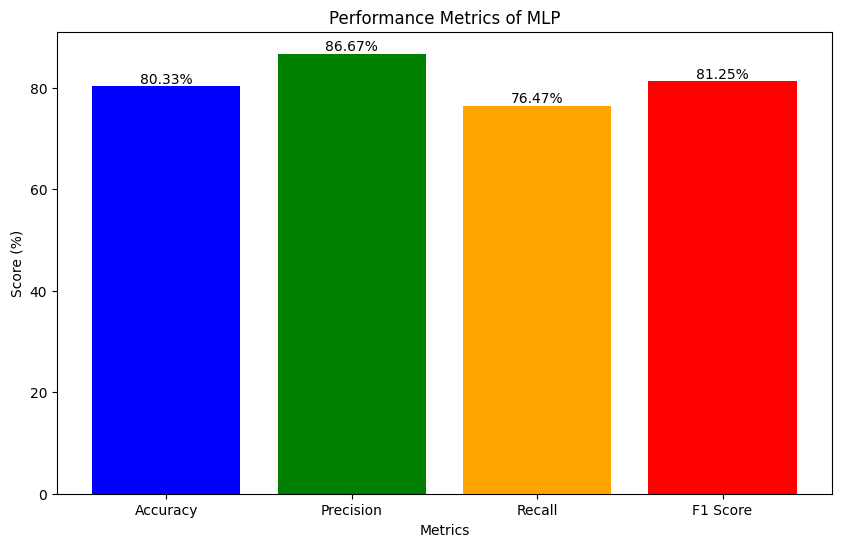

In [89]:
# Define the scores for Simple Random Forest
mlp_scores = [score_smlp, smlp_precision, smlp_recall, smlp_f1]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(score_names, mlp_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics of MLP')
plt.xlabel('Metrics')
plt.ylabel('Score (%)')

# Add the scores as text labels
for i in range(len(mlp_scores)):
    plt.text(i, mlp_scores[i], str(mlp_scores[i]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

##Optimization(Without scaling)

In [90]:
# Define a wider range of hyperparameters to search over
param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (32, 16), (64, 32)],
    'max_iter': [500],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Initialize the GridSearchCV object
grid_search_mlp = GridSearchCV(MLPClassifier(random_state=323), param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search_mlp.fit(X_train, Y_train)

# Get the best parameters and best accuracy
best_params = grid_search_mlp.best_params_
best_accuracy = grid_search_mlp.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_accuracy)


Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Best accuracy: 0.8227891156462585


In [91]:
# Initialize MLP classifier with best parameters
mlp_classifier_best =  MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'],
                         max_iter=best_params['max_iter'],
                         activation=best_params['activation'],
                         solver=best_params['solver'] ,
                         alpha=best_params['alpha'],
                         learning_rate= best_params['learning_rate'])
# Train the classifier on the training data
mlp_classifier_best.fit(X_train, Y_train)
Y_pred_mlp = mlp_classifier_best.predict(X_test)

In [92]:
score_mlp = round(accuracy_score(Y_pred_mlp,Y_test)*100,2)

print("The accuracy score achieved using MLP(Optimization) is: "+str(score_mlp)+" %")

The accuracy score achieved using MLP(Optimization) is: 78.69 %


In [93]:
# Calculate precision
mlp_precision = round(precision_score(Y_test, Y_pred_mlp)*100,2)
print("The precision score achieved using  MLP(Optimization) is is: "+str(mlp_precision)+" %")

# Calculate recall
mlp_recall = round(recall_score(Y_test, Y_pred_mlp)*100,2)
print("The recall score achieved using  MLP(Optimization) is is: "+str(mlp_recall)+" %")

# Calculate F1-score
mlp_f1 = round(f1_score(Y_test, Y_pred_mlp)*100,2)
print("The f1 score achieved using MLP(Optimization) is: "+str(mlp_f1)+" %")

The precision score achieved using  MLP(Optimization) is is: 76.92 %
The recall score achieved using  MLP(Optimization) is is: 88.24 %
The f1 score achieved using MLP(Optimization) is: 82.19 %


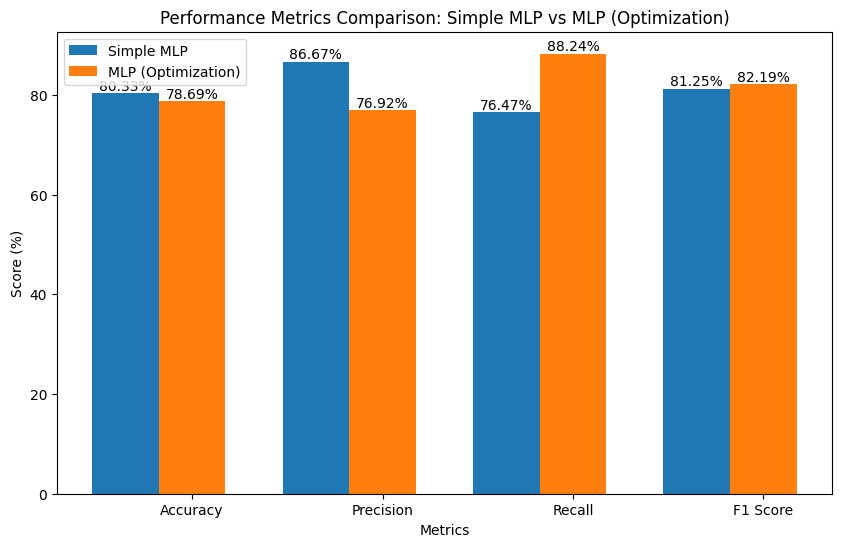

In [95]:
# Define the scores for Random Forest (Optimization)
mlp_optimization_scores = [score_mlp, mlp_precision, mlp_recall, mlp_f1]

# Combine all scores
all_scores = [mlp_scores, mlp_optimization_scores]
methods = ["Simple MLP", "MLP (Optimization)"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(score_names))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison: Simple MLP vs MLP (Optimization)')
plt.xticks([x + bar_width for x in index], score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

In [96]:
# Initialize MLP classifier with best parameters
mlp_classifier_best_sc = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'],
                         max_iter=best_params['max_iter'],
                         activation=best_params['activation'],
                         solver=best_params['solver'] ,
                         alpha=best_params['alpha'],
                         learning_rate= best_params['learning_rate'])

# Train the classifier on the training data
mlp_classifier_best_sc.fit(X_train_scaled, Y_train)
Y_pred_mlp_sc = mlp_classifier_best.predict(X_test_scaled)
score_mlp_sc = round(accuracy_score(Y_pred_mlp_sc,Y_test)*100,2)

print("The accuracy score achieved using MLP(Optimization_scaled) is: "+str(score_mlp_sc)+" %")

The accuracy score achieved using MLP(Optimization_scaled) is: 83.61 %


In [97]:
# Calculate precision
mlp_precision_sc = round(precision_score(Y_test, Y_pred_mlp_sc)*100,2)
print("The precision score achieved using MLP(Optimization_scaled) is: "+str(mlp_precision_sc)+" %")

# Calculate recall
mlp_recall_sc = round(recall_score(Y_test, Y_pred_mlp_sc)*100,2)
print("The recall score achieved using MLP(Optimization_scaled) is: "+str(mlp_recall_sc)+" %")

# Calculate F1-score
mlp_f1_sc = round(f1_score(Y_test, Y_pred_mlp_sc)*100,2)
print("The f1 score achieved using MLP(Optimization_scaled) is: "+str(mlp_f1_sc)+" %")

The precision score achieved using MLP(Optimization_scaled) is: 83.33 %
The recall score achieved using MLP(Optimization_scaled) is: 88.24 %
The f1 score achieved using MLP(Optimization_scaled) is: 85.71 %


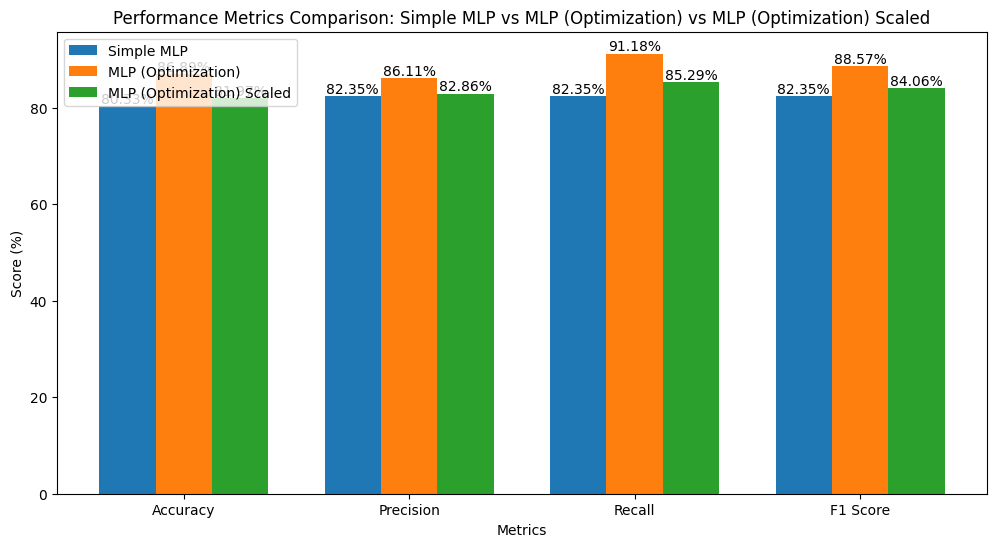

In [ ]:
# Define the scores for Random Forest (Optimization) with scaled features
mlp_scaled_scores = [score_mlp_sc, mlp_precision_sc, mlp_recall_sc, mlp_f1_sc]

# Combine all scores
all_scores = [mlp_scores, mlp_optimization_scores, mlp_scaled_scores]
methods = ["Simple MLP", "MLP (Optimization)", "MLP (Optimization) Scaled"]
score_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(score_names))
for i in range(len(all_scores)):
    plt.bar([x + bar_width*i for x in index], all_scores[i], bar_width, label=methods[i])

plt.xlabel('Metrics')
plt.ylabel('Score (%)')
plt.title('Performance Metrics Comparison: Simple MLP vs MLP (Optimization) vs MLP (Optimization) Scaled')
plt.xticks([x + bar_width for x in index], score_names)
plt.legend()

# Add the scores as text labels
for i in range(len(all_scores)):
    for j in range(len(all_scores[i])):
        plt.text(j + bar_width*i, all_scores[i][j], str(all_scores[i][j]) + '%', ha='center', va='bottom')

# Show the plot
plt.show()

## VI. Output final score

##comparative Aanalysis Model(Without Optimization)



In [98]:
s_scores = [score_ssvm,score_sknn,score_sdt,score_srf,score_smlp]
s_precision = [ssvm_precision, sknn_precision, sdt_precision, srf_precision, smlp_precision]
s_recall = [ssvm_recall, sknn_recall, sdt_recall, srf_recall, smlp_recall]
s_f1 = [ssvm_f1, sknn_f1, sdt_f1, srf_f1, smlp_f1]

algorithms = ["Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","MLP"]

for i in range(len(algorithms)):
    print("The Accuracy score achieved using "+algorithms[i]+" is: "+str(s_scores[i])+" %")
    print("The Precision score achieved using "+algorithms[i]+" is: "+str(s_precision[i])+" %")
    print("The Recall score achieved using "+algorithms[i]+" is: "+str(s_recall[i])+" %")
    print("The F1 score achieved using "+algorithms[i]+" is: "+str(s_f1[i])+" %")

The Accuracy score achieved using Support Vector Machine is: 68.85 %
The Precision score achieved using Support Vector Machine is: 67.44 %
The Recall score achieved using Support Vector Machine is: 85.29 %
The F1 score achieved using Support Vector Machine is: 75.32 %
The Accuracy score achieved using K-Nearest Neighbors is: 63.93 %
The Precision score achieved using K-Nearest Neighbors is: 68.75 %
The Recall score achieved using K-Nearest Neighbors is: 64.71 %
The F1 score achieved using K-Nearest Neighbors is: 66.67 %
The Accuracy score achieved using Decision Tree is: 73.77 %
The Precision score achieved using Decision Tree is: 80.0 %
The Recall score achieved using Decision Tree is: 70.59 %
The F1 score achieved using Decision Tree is: 75.0 %
The Accuracy score achieved using Random Forest is: 83.61 %
The Precision score achieved using Random Forest is: 83.33 %
The Recall score achieved using Random Forest is: 88.24 %
The F1 score achieved using Random Forest is: 85.71 %
The Accura

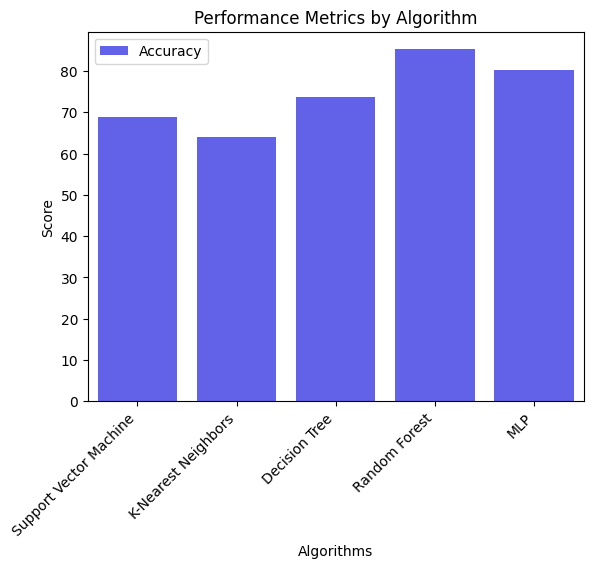

In [ ]:
# Plotting the data
sns.barplot(x=algorithms, y=s_scores, color='b', alpha=0.7, label='Accuracy')


# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics by Algorithm')
plt.xticks(rotation=45, ha='right')
plt.legend()

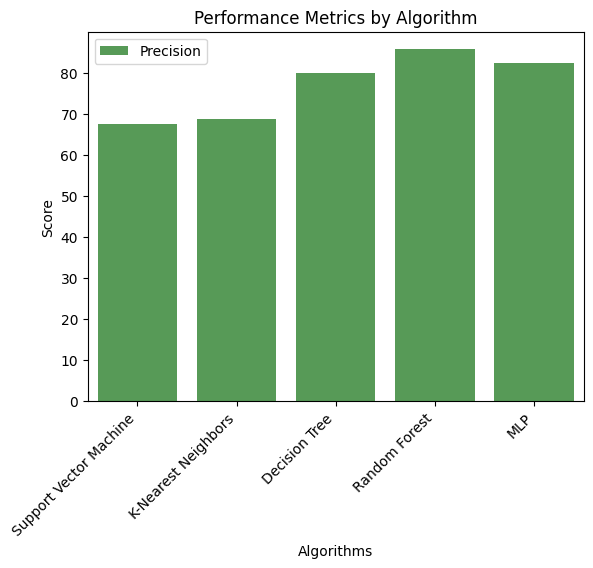

In [ ]:
sns.barplot(x=algorithms, y=s_precision, color='g', alpha=0.7, label='Precision')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics by Algorithm')
plt.xticks(rotation=45, ha='right')
plt.legend()

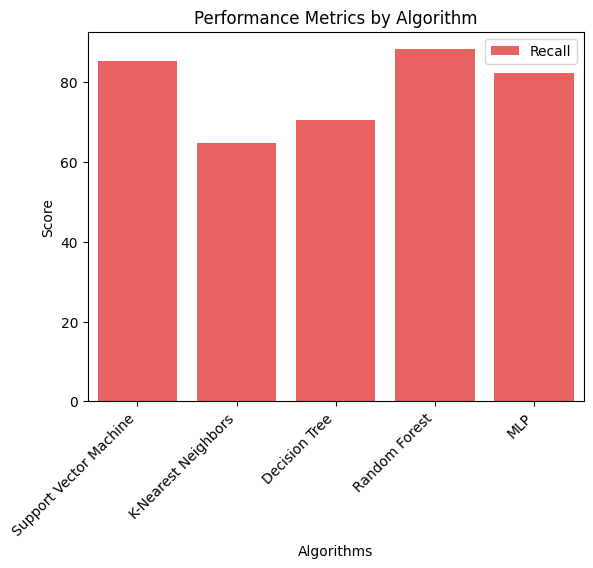

In [ ]:
sns.barplot(x=algorithms, y=s_recall, color='r', alpha=0.7, label='Recall')

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics by Algorithm')
plt.xticks(rotation=45, ha='right')
plt.legend()



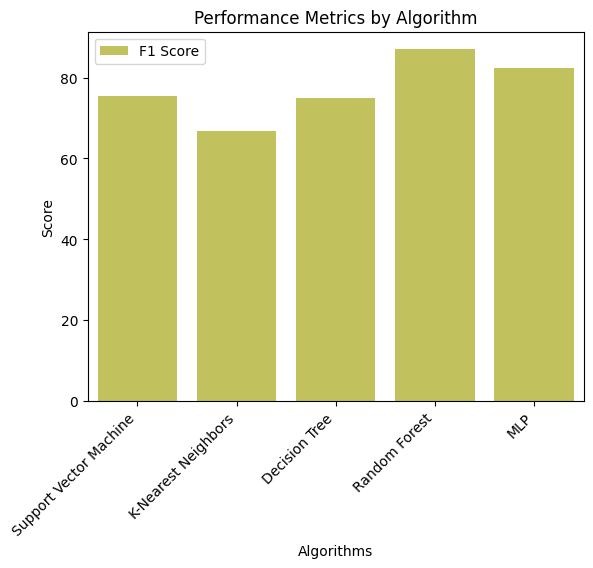

In [ ]:
sns.barplot(x=algorithms, y=s_f1, color='y', alpha=0.7, label='F1 Score')
# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics by Algorithm')
plt.xticks(rotation=45, ha='right')
plt.legend()

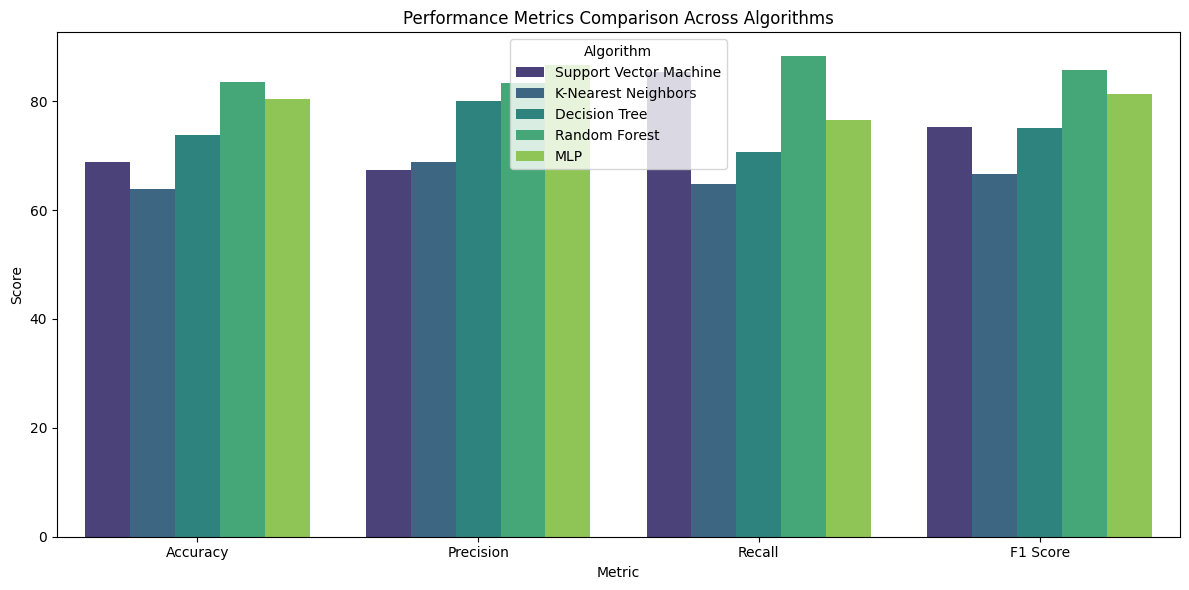

In [99]:
# Data preparation
algorithms = ["Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "MLP"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Scores for each algorithm and metric
scores_data = [
    [score_ssvm, ssvm_precision, ssvm_recall, ssvm_f1],
    [score_sknn, sknn_precision, sknn_recall, sknn_f1],
    [score_sdt, sdt_precision, sdt_recall, sdt_f1],
    [score_srf, srf_precision, srf_recall, srf_f1],
    [score_smlp, smlp_precision, smlp_recall, smlp_f1]
]

# Reshape the data into a DataFrame
data = pd.DataFrame(scores_data, columns=metrics)
data['Algorithm'] = algorithms
data = pd.melt(data, id_vars='Algorithm', var_name='Metric', value_name='Score')

# Creating the grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Algorithm', data=data, palette="viridis")

# Adding labels and title
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison Across Algorithms')
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

In [100]:
import plotly.graph_objects as go

# Data preparation
algorithms = ["Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "MLP"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Scores for each algorithm and metric
scores_data = [
    [score_svm, svm_precision, svm_recall, svm_f1],
    [score_knn, knn_precision, knn_recall, knn_f1],
    [score_dt, dt_precision, dt_recall, dt_f1],
    [score_rf, rf_precision, rf_recall, rf_f1],
    [score_mlp, mlp_precision, mlp_recall, mlp_f1]
]

# Create traces for each algorithm
traces = []
for i, algo in enumerate(algorithms):
    trace = go.Bar(x=metrics, y=scores_data[i], name=algo)
    traces.append(trace)

# Layout
layout = go.Layout(
    title='Performance Metrics Comparison Across Algorithms(Optimized-scaled)(Per metics)',
    xaxis=dict(title='Metric'),
    yaxis=dict(title='Score'),
    barmode='group'
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [101]:
import plotly.graph_objects as go

# Data preparation
algorithms = ["Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "MLP"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Scores for each algorithm and metric
scores_data = [
    [score_ssvm, ssvm_precision, ssvm_recall, ssvm_f1],
    [score_sknn, sknn_precision, sknn_recall, sknn_f1],
    [score_sdt, sdt_precision, sdt_recall, sdt_f1],
    [score_srf, srf_precision, srf_recall, srf_f1],
    [score_smlp, smlp_precision, smlp_recall, smlp_f1]
]

# Transpose scores_data to have algorithms as rows and metrics as columns
scores_data_transposed = list(map(list, zip(*scores_data)))

# Create traces for each metric
traces = []
for i, metric in enumerate(metrics):
    trace = go.Bar(x=algorithms, y=scores_data_transposed[i], name=metric)
    traces.append(trace)

# Layout
layout = go.Layout(
    title='Performance Metrics Comparison Across Algorithms',
    xaxis=dict(title='Algorithm'),
    yaxis=dict(title='Score'),
    barmode='group'
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()


##comparative Aanalysis Model(Optimization)

In [102]:
scores = [score_svm,score_knn,score_dt,score_rf,score_mlp]
precision = [svm_precision, knn_precision, dt_precision, mlp_precision]
recall = [svm_recall, knn_recall, dt_recall, mlp_recall]
f1 = [svm_f1, knn_f1, dt_f1, mlp_f1]
algorithms = ["Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","MLP"]

for i in range(len(algorithms)):
    print("The Accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
    print("The Precision score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
    print("The Recall score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")
    print("The F1-score score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The Accuracy score achieved using Support Vector Machine is: 83.61 %
The Precision score achieved using Support Vector Machine is: 83.61 %
The Recall score achieved using Support Vector Machine is: 83.61 %
The F1-score score achieved using Support Vector Machine is: 83.61 %
The Accuracy score achieved using K-Nearest Neighbors is: 63.93 %
The Precision score achieved using K-Nearest Neighbors is: 63.93 %
The Recall score achieved using K-Nearest Neighbors is: 63.93 %
The F1-score score achieved using K-Nearest Neighbors is: 63.93 %
The Accuracy score achieved using Decision Tree is: 78.69 %
The Precision score achieved using Decision Tree is: 78.69 %
The Recall score achieved using Decision Tree is: 78.69 %
The F1-score score achieved using Decision Tree is: 78.69 %
The Accuracy score achieved using Random Forest is: 85.25 %
The Precision score achieved using Random Forest is: 85.25 %
The Recall score achieved using Random Forest is: 85.25 %
The F1-score score achieved using Random For

In [ ]:
# Data preparation
algorithms = ["Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "MLP"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Scores for each algorithm and metric
scores_data = [
    [score_svm, svm_precision, svm_recall, svm_f1],
    [score_knn, knn_precision, knn_recall, knn_f1],
    [score_dt, dt_precision, dt_recall, dt_f1],
    [score_rf, rf_precision, rf_recall, rf_f1],
    [score_mlp, mlp_precision, mlp_recall, mlp_f1]
]

# Transpose scores_data to have algorithms as rows and metrics as columns
scores_data_transposed = list(map(list, zip(*scores_data)))

# Create traces for each metric
traces = []
for i, metric in enumerate(metrics):
    trace = go.Bar(x=algorithms, y=scores_data_transposed[i], name=metric)
    traces.append(trace)

# Layout
layout = go.Layout(
    title='Performance Metrics Comparison Across Algorithms(Optimization)',
    xaxis=dict(title='Algorithm'),
    yaxis=dict(title='Score(Optimization)'),
    barmode='group'
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()

##comparative Aanalysis Model(Optimization-scaled)

In [103]:
scores_sc = [score_svm_sc,score_knn_sc,score_dt_sc,score_rf_sc, score_mlp_sc]
precision_sc = [svm_precision_sc, knn_precision_sc, dt_precision_sc,rf_precision_sc, mlp_precision_sc]
recall_sc = [svm_recall_sc, knn_recall_sc, dt_recall_sc,rf_recall_sc, mlp_recall_sc]
f1_sc = [svm_f1_sc, knn_f1_sc, dt_f1_sc, rf_f1_sc, mlp_f1_sc]
algorithms = ["Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","MLP"]

for i in range(len(algorithms)):
    print("The Accuracy score achieved using "+algorithms[i]+" and Data preprocessing is: "+str(scores_sc[i])+" %")
    print("The Precision score achieved using "+algorithms[i]+" and Data preprocessing is: "+str(precision_sc[i])+" %")
    print("The Recall score achieved using "+algorithms[i]+" and Data preprocessing is: "+str(recall_sc[i])+" %")
    print("The f1 s_score achieved using "+algorithms[i]+" and Data preprocessing is: "+str(f1_sc[i])+" %")

The Accuracy score achieved using Support Vector Machine and Data preprocessing is: 80.33 %
The Precision score achieved using Support Vector Machine and Data preprocessing is: 78.95 %
The Recall score achieved using Support Vector Machine and Data preprocessing is: 88.24 %
The f1 s_score achieved using Support Vector Machine and Data preprocessing is: 83.33 %
The Accuracy score achieved using K-Nearest Neighbors and Data preprocessing is: 83.61 %
The Precision score achieved using K-Nearest Neighbors and Data preprocessing is: 83.33 %
The Recall score achieved using K-Nearest Neighbors and Data preprocessing is: 88.24 %
The f1 s_score achieved using K-Nearest Neighbors and Data preprocessing is: 85.71 %
The Accuracy score achieved using Decision Tree and Data preprocessing is: 78.69 %
The Precision score achieved using Decision Tree and Data preprocessing is: 86.21 %
The Recall score achieved using Decision Tree and Data preprocessing is: 73.53 %
The f1 s_score achieved using Decision

In [ ]:
# Data preparation
algorithms = ["Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "MLP"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Scores for each algorithm and metric
scores_data = [
    [score_svm_sc, svm_precision_sc, svm_recall_sc, svm_f1_sc],
    [score_knn_sc, knn_precision_sc, knn_recall_sc, knn_f1_sc],
    [score_dt_sc, dt_precision_sc, dt_recall_sc, dt_f1_sc],
    [score_rf, rf_precision_sc, rf_recall_sc, rf_f1_sc],
    [score_mlp, mlp_precision_sc, mlp_recall_sc, mlp_f1_sc]
]

# Transpose scores_data to have algorithms as rows and metrics as columns
scores_data_transposed = list(map(list, zip(*scores_data)))

# Create traces for each metric
traces = []
for i, metric in enumerate(metrics):
    trace = go.Bar(x=algorithms, y=scores_data_transposed[i], name=metric)
    traces.append(trace)

# Layout
layout = go.Layout(
    title='Performance Metrics Comparison Across Algorithms(Optimization_scaled)',
    xaxis=dict(title='Algorithm'),
    yaxis=dict(title='Score(Optimized_scaled)'),
    barmode='group'
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()